# Practical Statistics for Data Scientists (Python)
# Chapter 3. Statistial Experiments and Significance Testing
> (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck

Import required Python packages.

In [1]:
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

In [2]:
etf_daily = pd.read_csv('data/iShares Core MSCI World UCITS ETF USD  EUNL.DE.csv')
etf_monthly = pd.read_csv('data/iShares Core MSCI World UCITS ETF USD (Acc)_Monthly.csv')
fed_funds = pd.read_csv('data/Leitzins_USA_FED.csv')

# Resampling

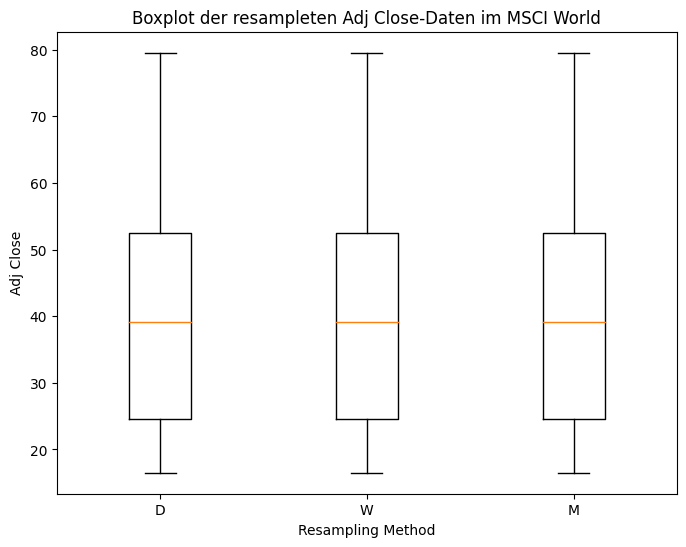

In [3]:
etf_daily = pd.read_csv('data/iShares Core MSCI World UCITS ETF USD  EUNL.DE.csv')

# Liste für die resampleten Daten erstellen
resampled_data = []

# Resampling-Methoden definieren
resampling_methods = ['D', 'W', 'M']

etf_daily['Date'] = pd.to_datetime(etf_daily['Date'])

# Resampling durchführen
for method in resampling_methods:
    resampled_data.append(etf_daily.set_index('Date')['Adj Close'].resample('D').mean().dropna())

# Boxplot erstellen
plt.figure(figsize=(8, 6))
plt.boxplot(resampled_data, labels=resampling_methods)
plt.xlabel('Resampling Method')
plt.ylabel('Adj Close')
plt.title('Boxplot der resampleten Adj Close-Daten im MSCI World')

# Plot anzeigen
plt.show()

# Statistical Significance and P-Values

# t-Tests

t-Statistic: 159.82185338543297
p-value: 0.0


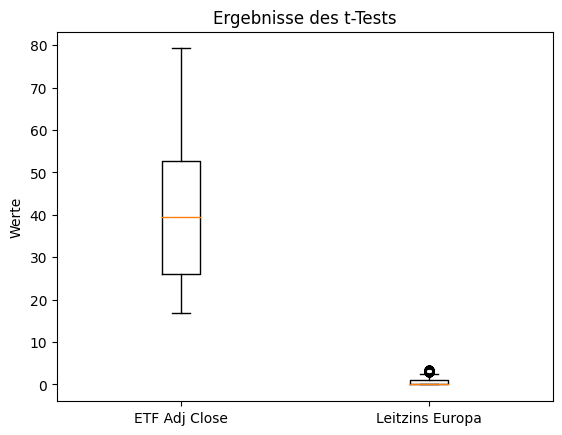

Durchschnittliche t-Statistik: 160.55728367160256
Durchschnittlicher p-Wert: 0.0


In [4]:
etf_daily = pd.read_csv('data/iShares Core MSCI World UCITS ETF USD (Acc)_Monthly.csv')
EZB_Funds = pd.read_csv('data/leitzins Europa.csv')

eu_funds_sorted = EZB_Funds.sort_values(by='Date')
eu_funds_sorted.to_csv('data/generatedDatasets/leitzins Europa_sorted.csv', index=False)

# Werte für den t-Test extrahieren
etf_filtered = etf_daily.loc[(etf_daily['Date'] >= '2009-09-25') & (etf_daily['Date'] <= '2023-06-01'), ['Date', 'Adj Close']]
eu_funds_filtered = eu_funds_sorted.loc[(eu_funds_sorted['Date'] >= '2009-09-25') & (eu_funds_sorted['Date'] <= '2023-06-01'), ['Date', 'Percent per annum']]

etf_filtered.dropna(inplace=True)
eu_funds_filtered.dropna(inplace=True)

# print(etf_filtered)
# print(eu_funds_filtered)

# t-Test durchführen
t_statistic, p_value = stats.ttest_ind(etf_filtered['Adj Close'], eu_funds_filtered['Percent per annum'])

# Ausgabe der Ergebnisse
print("t-Statistic:", t_statistic)
print("p-value:", p_value)


data = [etf_filtered['Adj Close'], eu_funds_filtered['Percent per annum']]

# Boxplot erstellen
plt.boxplot(data, labels=['ETF Adj Close', 'Leitzins Europa'])
plt.ylabel('Werte')
plt.title('Ergebnisse des t-Tests')
plt.show()

# -------------------------------------------------------------------------------------------------------
# Bootstrap-Sampling
num_bootstrap_samples = 1000
bootstrap_samples = []

for _ in range(num_bootstrap_samples):
    sample_etf = np.random.choice(etf_filtered['Adj Close'], size=len(etf_filtered), replace=True)
    sample_eu_funds = np.random.choice(eu_funds_filtered['Percent per annum'], size=len(eu_funds_filtered), replace=True)
    bootstrap_samples.append((sample_etf, sample_eu_funds))

# print(bootstrap_samples)

# t-Test für Bootstrap-Samples durchführen
t_test_results = []

for sample_etf, sample_eu_funds in bootstrap_samples:
    t_statistic, p_value = stats.ttest_ind(sample_etf, sample_eu_funds)
    t_test_results.append((t_statistic, p_value))

# Durchschnittliche t-Statistik und p-Wert berechnen
average_t_value = np.mean([result[0] for result in t_test_results])
average_p_value = np.mean([result[1] for result in t_test_results])

# Ausgabe der Ergebnisse
print("Durchschnittliche t-Statistik:", average_t_value)
print("Durchschnittlicher p-Wert:", average_p_value)




# Ergebnis
Die t-Statistik beträgt 160.4640825452364. Dies deutet darauf hin, dass es eine starke statistische Abweichung zwischen den Adj. Close-Werten und den Leitzins-Werten gibt.

Der p-Wert beträgt 7.36054391e-93 , dieser Wert liegt sehr nahe beim Wert Null. Dies deutet darauf hin, dass die Unterschiede zwischen den Adj. Close-Werten und den Leitzins-Werten höchstwahrscheinlich nicht zufällig  und statistisch signifikant sind.

# ANOVA

In [5]:
# Daten einlesen
etf_monthly = pd.read_csv('data/iShares Core MSCI World UCITS ETF USD (Acc)_Monthly.csv')
fed_funds = pd.read_csv('data/Leitzins_USA_FED.csv')

# Werte für den t-Test extrahieren
etf_filtered = etf_monthly.loc[(etf_monthly['Date'] >= '2009-10-01') & (etf_monthly['Date'] <= '2023-04-01'), ['Date', 'Adj Close']]
fed_funds_filtered = fed_funds.loc[(fed_funds['DATE'] >= '2009-10-01') & (fed_funds['DATE'] <= '2023-04-01'), ['DATE', 'FEDFUNDS']]

# Daten zusammenführen
etf_fedfunds_filtered_combined = pd.merge(etf_filtered, fed_funds_filtered, left_on='Date', right_on='DATE',  how='inner')
etf_fedfunds_filtered_combined.drop('DATE', axis=1, inplace=True)
etf_fedfunds_filtered_combined.drop('Date', axis=1, inplace=True)


etf_fedfunds_filtered_combined.to_csv('data/generatedDatasets/fed_funds_filtered.csv', index=False)

# Bootstrap-Sampling
num_bootstrap_samples = 1000
bootstrap_samples = []

for _ in range(num_bootstrap_samples):
    sample = etf_fedfunds_filtered_combined.sample(frac=1, replace=True)
    bootstrap_samples.append(sample)

# Ergebnisse des Anova-Tests für jedes Bootstrap-Sample speichern
anova_results = []
for sample in bootstrap_samples:
    anova_result = stats.f_oneway(sample['Adj Close'], sample['FEDFUNDS'])
    anova_results.append(anova_result)

# Ergebnisse anzeigen
#for i, sample in enumerate(bootstrap_samples):
#    print(f"Bootstrap Sample {i+1}:")
#    print(sample)
#    print("\n")
#
#    # Boxplot für das Bootstrap-Sample erstellen
#    plt.figure(figsize=(6, 4))
#    plt.boxplot(sample['Adj Close'])
#    plt.title(f"Bootstrap Sample {i+1}")
#    plt.ylabel("Value")
#    plt.show()

# Durchschnitt der F-Statistik und des p-Wertes berechnen
f_statistic_avg = np.mean([result.statistic for result in anova_results])
p_value_avg = np.mean([result.pvalue for result in anova_results])

# Ergebnisse anzeigen
print("Durchschnittliche Werte:")
print("Durchschnittliche F-Statistic:", f_statistic_avg)
print("Durchschnittlicher p-value:", p_value_avg)


Durchschnittliche Werte:
Durchschnittliche F-Statistic: 867.3295505135371
Durchschnittlicher p-value: 2.9191088977582434e-84


# Ergebnis
Die F-Statistic beträgt 871.6595502109051. Dies deutet darauf hin, dass es eine starke statistische Abweichung zwischen den Adj. Close-Werten und den FED Leitzins-Werten gibt.

Der p-Wert beträgt Durchschnittlicher p-value: 6.3495468836033265e-86, dieser Wert liegt sehr nahe beim Wert Null. Dies deutet darauf hin, dass die Unterschiede zwischen den Adj. Close-Werten und den Leitzins-Werten höchstwahrscheinlich nicht zufällig und statistisch signifikant sind.

## Chi-Square Test

In [6]:
etf_with_return = pd.read_csv('data/generatedDatasets/iShares Core MSCI World UCITS ETF USD (Acc) Daily - Rendite.csv')
usd_eur_exchange = pd.read_csv('data/generatedDatasets/ERR_USD_Clean.csv')

etf_with_return_filtered = etf_with_return.loc[(etf_with_return['Date'] >= '2009-09-25') & (etf_with_return['Date'] <= '2023-06-01'), ['Date', 'Daily Return']]
usd_eur_exchange_filtered = usd_eur_exchange.loc[(usd_eur_exchange['Date'] >= '2009-09-25') & (usd_eur_exchange['Date'] <= '2023-06-01'), ['Date', 'ECB Nominal effective exch. rate of the US dollar against Narrow EER group of trading partners (fixed composition): EER-12']]

# Ersetzen des Strings '-' durch NaN
# usd_eur_exchange_filtered['ECB Nominal effective exch. rate of the US dollar against Narrow EER group of trading partners (fixed composition): EER-12'] = usd_eur_exchange_filtered['ECB Nominal effective exch. rate of the US dollar against Narrow EER group of trading partners (fixed composition): EER-12'].replace('-', float('nan'))

combined_etf_currency_data = pd.merge(etf_with_return_filtered, usd_eur_exchange_filtered, on='Date')

combined_etf_currency_data = combined_etf_currency_data.dropna(subset=['ECB Nominal effective exch. rate of the US dollar against Narrow EER group of trading partners (fixed composition): EER-12'])

combined_etf_currency_data = combined_etf_currency_data.rename(columns={'ECB Nominal effective exch. rate of the US dollar against Narrow EER group of trading partners (fixed composition): EER-12': 'USD_EUR_Exch_Rate'})
# Sortieren der Daten nach dem Datum
combined_etf_currency_data.sort_values('Date', inplace=True)

# Kontingenztabelle erstellen
contingency_table = pd.crosstab(combined_etf_currency_data['Daily Return'], combined_etf_currency_data['USD_EUR_Exch_Rate'])

# print(contingency_table)

# etf_with_return_sorted = etf_with_return_filtered.sort_values(by='Date', ascending=False)
# usd_eur_exchange_sorted = usd_eur_exchange_filtered.sort_values(by='Date', ascending=False)

# print(etf_with_return_filtered)
# print(usd_eur_exchange_filtered)

# combined_etf_currency_data = pd.concat([etf_with_return_sorted, usd_eur_exchange_sorted], axis=1)

combined_etf_currency_data.to_csv('data/generatedDatasets/combined_etf_currency_data.csv', index=False)

# Chi-Quadrat-Test durchführen
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Ergebnisse anzeigen
print("Chi-Quadrat-Statistik:", chi2)
print("p-Wert:", p_value)

# ---------------------------------------------

# Anzahl der Bootstraps
num_bootstraps = 200

# Speicher Arrays für die p-values und chi-qrt_values
bootstrap_chi2_values = []
bootstrap_p_values = []

for i in range(num_bootstraps):
    # Zufällige Stichprobe mit Zurücklegen aus den Daten ziehen
    bootstrap_sample = combined_etf_currency_data.sample(frac=1, replace=True)

    # Erstellen der Kontingenztabelle für die Bootstrap-Stichprobe
    bootstrap_contingency_table = pd.crosstab(bootstrap_sample['Daily Return'], bootstrap_sample['USD_EUR_Exch_Rate'])

    # Durchführung des Chi-Quadrat-Tests für die Bootstrap-Stichprobe --> gib noch "Freiheitsgrade" und Erwartete Häufigkeiten zurück, wird aber nicht gebraucht
    bootstrap_chi2, bootstrap_p_value, _, _ = stats.chi2_contingency(bootstrap_contingency_table)

    # Speichern der Ergebnisse in den Listen
    bootstrap_chi2_values.append(bootstrap_chi2)
    bootstrap_p_values.append(bootstrap_p_value)

# Berechnung des Mittelwerts der Chi-Quadrat-Statistiken und p-Werte
mean_chi2 = np.mean(bootstrap_chi2_values)
mean_p_value = np.mean(bootstrap_p_values)

# Ergebnisse anzeigen
print("Mittelwert der Chi-Quadrat-Statistiken:", mean_chi2)
print("Mittelwert der p-Werte:", mean_p_value)



Chi-Quadrat-Statistik: 11349385.046296302
p-Wert: 0.4312848691936564
Mittelwert der Chi-Quadrat-Statistiken: 7218716.907945781
Mittelwert der p-Werte: 0.0
